In [2]:
import json
from pprint import pprint

model_names = [
    "claude-3.5-sonnet",
    "gemini-v1.5-pro",
    "gpt-4o",
    # "gpt-4o_serp",
    # "gpt-4o-mini_serp",
    "gpt-4o-mini",
    # "llama31-70b-ppl", TODO: update data
    "llama31-70b",
    "llama31-405b",
]
hard_results_dict = {}
for model_name in model_names:
    hard_results_dict[model_name] = []
    with open(f"../eval_results/arena_hard_{model_name}.jsonl", "r") as f:
        for line in f:
            hard_results_dict[model_name].append(json.loads(line))

In [3]:
from collections import Counter, defaultdict
hard_win_dict = {}
for model_name in model_names:
    hard_win_dict[model_name] = Counter()
    for d in hard_results_dict[model_name]:
        if "NETWORK ERROR" in d["agent_response"]:
            print(f"NETWORK ERROR for {model_name}")
            continue
        hard_win_dict[model_name][d["grade"]] += 1
pprint(hard_win_dict)

NETWORK ERROR for claude-3.5-sonnet
NETWORK ERROR for claude-3.5-sonnet
NETWORK ERROR for claude-3.5-sonnet
NETWORK ERROR for claude-3.5-sonnet
NETWORK ERROR for claude-3.5-sonnet
NETWORK ERROR for claude-3.5-sonnet
NETWORK ERROR for gemini-v1.5-pro
NETWORK ERROR for gpt-4o-mini
NETWORK ERROR for llama31-70b
NETWORK ERROR for llama31-70b
NETWORK ERROR for llama31-70b
NETWORK ERROR for llama31-70b
NETWORK ERROR for llama31-405b
{'claude-3.5-sonnet': Counter({'base': 28, 'agent': 14, 'tie': 2}),
 'gemini-v1.5-pro': Counter({'base': 40, 'agent': 8, 'tie': 1}),
 'gpt-4o': Counter({'agent': 25, 'base': 18, 'tie': 7}),
 'gpt-4o-mini': Counter({'base': 31, 'agent': 13, 'tie': 5}),
 'llama31-405b': Counter({'base': 38, 'agent': 10, 'tie': 1}),
 'llama31-70b': Counter({'base': 38, 'agent': 7, 'tie': 1})}


In [5]:
from collections import Counter, defaultdict
hard_win_dict_if_search = {True: {}, False: {}}
for model_name in model_names:
    hard_win_dict_if_search[True][model_name] = Counter()
    hard_win_dict_if_search[False][model_name] = Counter()
    for d in hard_results_dict[model_name]:
        if "NETWORK ERROR" in d["agent_response"]:
            print(f"NETWORK ERROR for {model_name}")
            continue
        hard_win_dict_if_search[d["do_search"]][model_name][d["grade"]] += 1
pprint(hard_win_dict_if_search)

NETWORK ERROR for claude-3.5-sonnet
NETWORK ERROR for claude-3.5-sonnet
NETWORK ERROR for claude-3.5-sonnet
NETWORK ERROR for claude-3.5-sonnet
NETWORK ERROR for claude-3.5-sonnet
NETWORK ERROR for claude-3.5-sonnet
NETWORK ERROR for gemini-v1.5-pro
NETWORK ERROR for gpt-4o-mini
NETWORK ERROR for llama31-70b
NETWORK ERROR for llama31-70b
NETWORK ERROR for llama31-70b
NETWORK ERROR for llama31-70b
NETWORK ERROR for llama31-405b
{False: {'claude-3.5-sonnet': Counter({'base': 4, 'agent': 1, 'tie': 1}),
         'gemini-v1.5-pro': Counter({'base': 38, 'agent': 5, 'tie': 1}),
         'gpt-4o': Counter({'agent': 23, 'base': 16, 'tie': 7}),
         'gpt-4o-mini': Counter({'base': 31, 'agent': 10, 'tie': 5}),
         'llama31-405b': Counter({'base': 27, 'agent': 5, 'tie': 1}),
         'llama31-70b': Counter({'base': 29, 'agent': 5, 'tie': 1})},
 True: {'claude-3.5-sonnet': Counter({'base': 24, 'agent': 13, 'tie': 1}),
        'gemini-v1.5-pro': Counter({'agent': 3, 'base': 2}),
        'gp

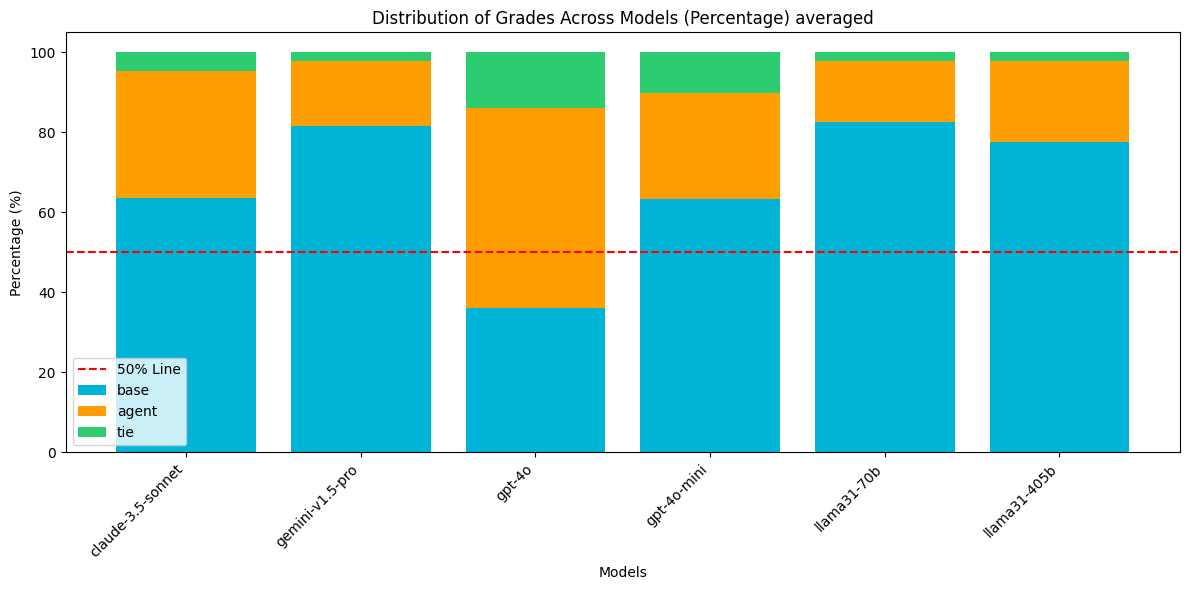

In [15]:
import matplotlib.pyplot as plt
import numpy as np



# Prepare data for stacked bar plot
def plot_stacked_bar(input_dict, name):
    grades = ['base', 'agent', 'tie']
    colors = ['#00b4d8', '#ff9e00', '#2ecc71']  # cyan blue, orange, green

    # Calculate percentages for each model
    model_data = {}
    for model in model_names:
        total = sum(input_dict[model].values())
        model_data[model] = [input_dict[model][grade] / total * 100 for grade in grades]

    # Create stacked bar plot
    fig, ax = plt.subplots(figsize=(12, 6))
    bottom = np.zeros(len(model_names))

    for i, grade in enumerate(grades):
        values = [model_data[model][i] for model in model_names]
        ax.bar(model_names, values, bottom=bottom, label=grade, color=colors[i])
        bottom += values

    # Add 50% line
    ax.axhline(y=50, color='r', linestyle='--', label='50% Line')

    # Customize plot
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Models')
    plt.ylabel('Percentage (%)')
    plt.title(f'Distribution of Grades Across Models (Percentage) {name}')
    plt.legend()
    plt.tight_layout()
    plt.show()
plot_stacked_bar(input_dict, name)


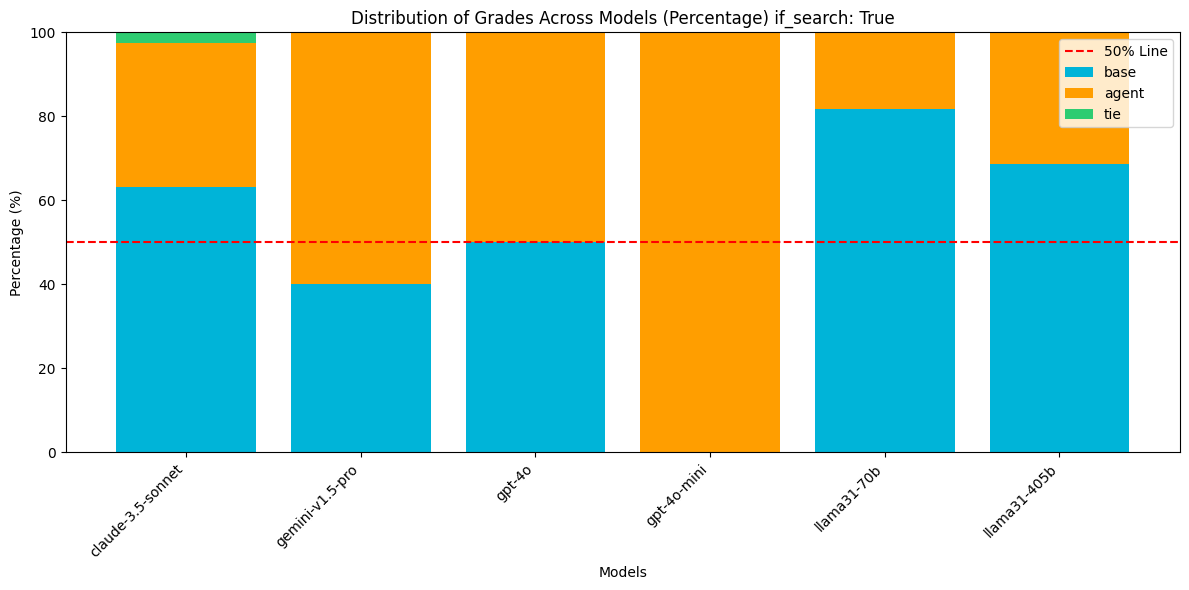

In [16]:
input_dict = hard_win_dict_if_search[True]
name = "if_search: True"  
plot_stacked_bar(input_dict, name)

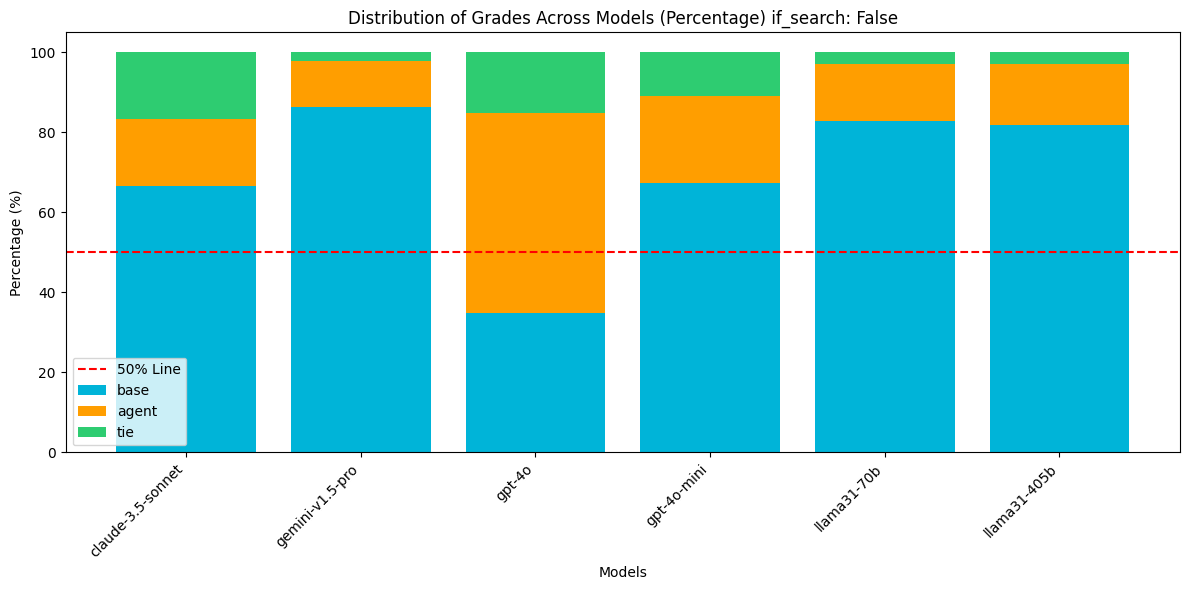

In [17]:
input_dict = hard_win_dict_if_search[False]
name = "if_search: False"
plot_stacked_bar(input_dict, name)

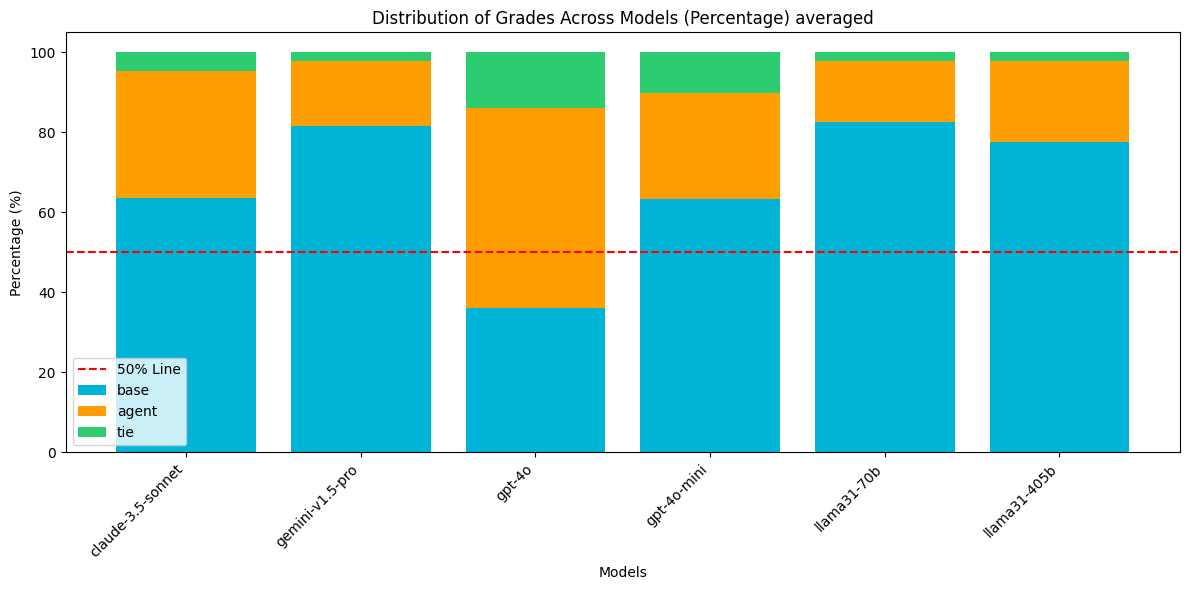

In [18]:
input_dict = hard_win_dict
name = "averaged"
plot_stacked_bar(input_dict, name)

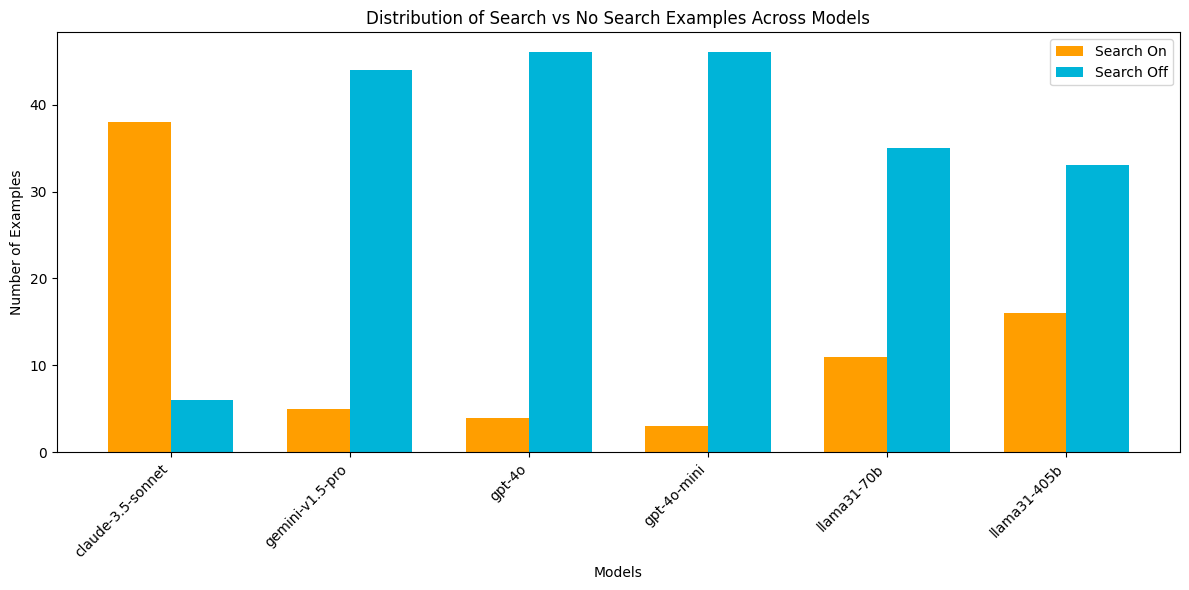

In [22]:
# Create data for bar plot
search_on_counts = [sum(hard_win_dict_if_search[True][model].values()) for model in model_names]
search_off_counts = [sum(hard_win_dict_if_search[False][model].values()) for model in model_names]

# Create bar plot
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(model_names))
width = 0.35

ax.bar(x - width/2, search_on_counts, width, label='Search On', color='#ff9e00')
ax.bar(x + width/2, search_off_counts, width, label='Search Off', color='#00b4d8')

# Customize plot
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.set_xlabel('Models')
ax.set_ylabel('Number of Examples')
ax.set_title('Distribution of Search vs No Search Examples Across Models')
ax.legend()

plt.tight_layout()
plt.show()
